#  #Task 2 : Movie Ratings with CodSoft

# Project: Investigate a MovieLens Rating dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> These files contain 1,000,209 anonymous ratings of approximately 3,900 movies
made by 6,040 MovieLens users who joined MovieLens in 2000.


### Question(s) / Tasks for Analysis
>Do we have useless columns that needs to be removed?.

>Do we have duplicated data? missing or null values?.

>What is the most recommended movies?.

>Analysis of Genres based on recommendations.

>Analysis of top genres.

>Exploring movies based on Recommendations and Ratings.

>Exploring of Gender

In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section, and after setting the questions, the unused columns will be dropped , so it can be more consistent and clear, also it will be free of dupl
icated and missing values.

In [2]:
# Read the 'users.dat' file with the 'latin1' encoding
users_df = pd.read_csv('users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'], encoding='latin1')

# Read the 'ratings.dat' file with the 'latin1' encoding
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin1')

# Read the 'movies.dat' file with the 'latin1' encoding
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='latin1')

# Verify the data
print(users_df.head())
print(ratings_df.head())
print(movies_df.head())

   UserID Gender  Age  Occupation ZipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [121]:
#merging the data
df = pd.merge(pd.merge(users_df, ratings_df, on='UserID'), movies_df, on='MovieID')

# Verify the merged DataFrame
df.head()

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [4]:
df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
ZipCode       0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

This dataset is free from any null values.

In [5]:
df.duplicated().sum().any()

False

Also it is free from any duplicated values too!
> This dataset is already clear from any missing or duplicated values.

<a id='eda'></a>
# Data Exploration

In [6]:
#checking the unique values
df.nunique()

UserID          6040
Gender             2
Age                7
Occupation        21
ZipCode         3439
MovieID         3706
Rating             5
Timestamp     458455
Title           3706
Genres           301
dtype: int64

We have 5 ratings, 6040 unique users, 7 different life stages, 3706 is equal for title and movieID so we have 3706 movies, 301 genres.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   ZipCode     1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [8]:
df.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,2.973831e+01,8.036138e+00,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.175198e+01,6.531336e+00,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,2.500000e+01,2.000000e+00,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,1.046455e+09


The maximum age is 56 and the mean of ages is around 30 so I think ratings will be more judged by youth opinions
>Rate is in a scale from 1 to 5, 1 for lowest 5 for highest

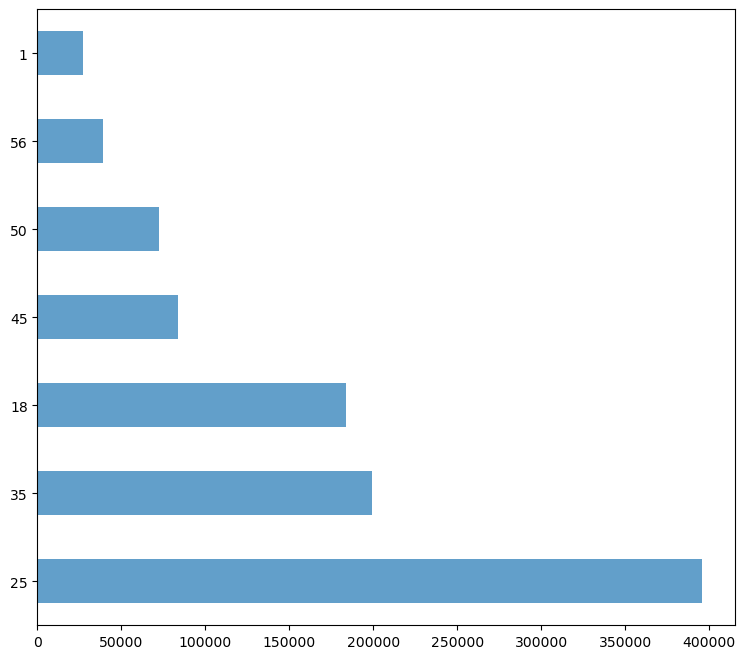

In [107]:
#Visualizing it to make it more clear
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(9,8))
plt.show()

In [9]:
df.shape

(1000209, 10)

We have 1000209 Reviews for different movies!

# Creating a new column to see if this movie is recommended or not based on Ratings
>   5 -- is recommended

> 4 & 3 -- you can give it a try

> 2 & 1 -- is not recommended

In [10]:
#i want to insert a new column to recommend me watch or not based on rating
def check_watch(x):
    if x>=4:
        return 'Recommended'
    elif x==3:
        return 'Give it a try'
    else:
        return 'Not Recommended'

In [123]:
#applying the function to fit the new column
df['Recommendations']= df['Rating'].apply(check_watch)

In [12]:
df.head(20)

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp,Title,Genres,Recommendations
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama,Give it a try
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama,Recommended


In [124]:
#exploring the count of each recommednations
df['Recommendations'].value_counts()

Recommended        575281
Give it a try      261197
Not Recommended    163731
Name: Recommendations, dtype: int64

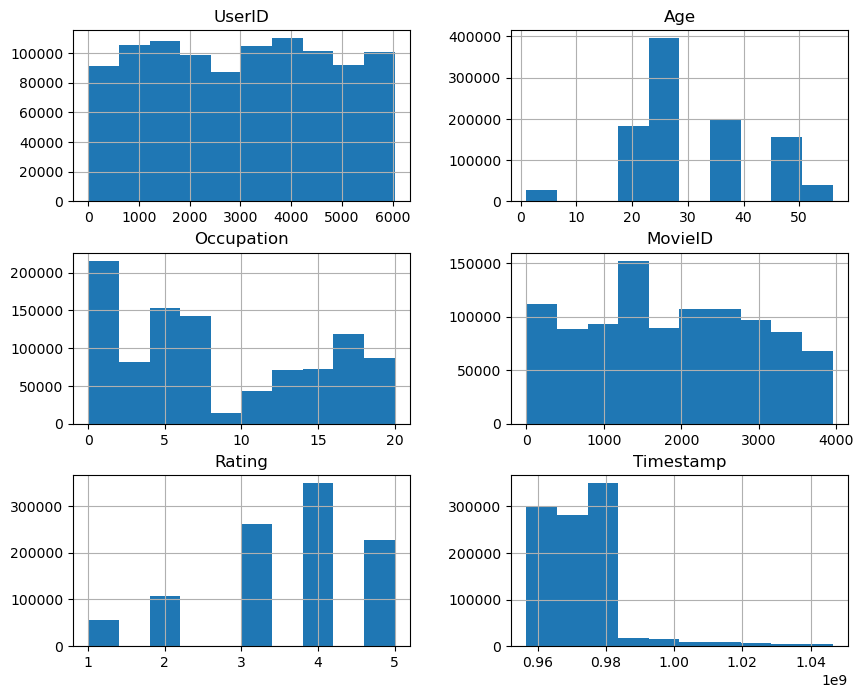

In [109]:
#visualizing the distibution in each column
df.hist(figsize=(10,8));

> Age has a more of 20th and 30th

> Rating 4 is the most frequent rating

# How many genres these data have, what they are? and what is the most created genres?

In [62]:
df['Genres'].nunique()

301

We have 301 of different genres , let's see what they are?

In [110]:
df['Genres'].unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [112]:
df['Genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

Looks like the most genres is drama, and the minimum is fantasy!

# Analysis of Genres based on recommendations

In [16]:
df['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

As we said earlier , rating 4 is the most frequent so, giving a try movies will be the maximum category of recommendations

In [20]:
grouped_df = df.groupby(['Recommendations', 'Genres'], as_index=False).size().reset_index().rename(columns={'size': 'Count'})

# Sort the grouped DataFrame by count in descending order
sorted_df = grouped_df.sort_values('Count', ascending=False)

# Print the sorted DataFrame
print(sorted_df.head())

     index Recommendations        Genres  Count
836    836     Recommended         Drama  72695
774    774     Recommended        Comedy  62293
176    176   Give it a try        Comedy  31971
239    239   Give it a try         Drama  26693
783    783     Recommended  Comedy|Drama  26468


Drama and comedy is the most recommended genres!

# Analysis of top genres

In [22]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [125]:
#variable to store the retured value
count = data('Genres')
#printing top 50 values
count.head(50)

Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
dtype: int64

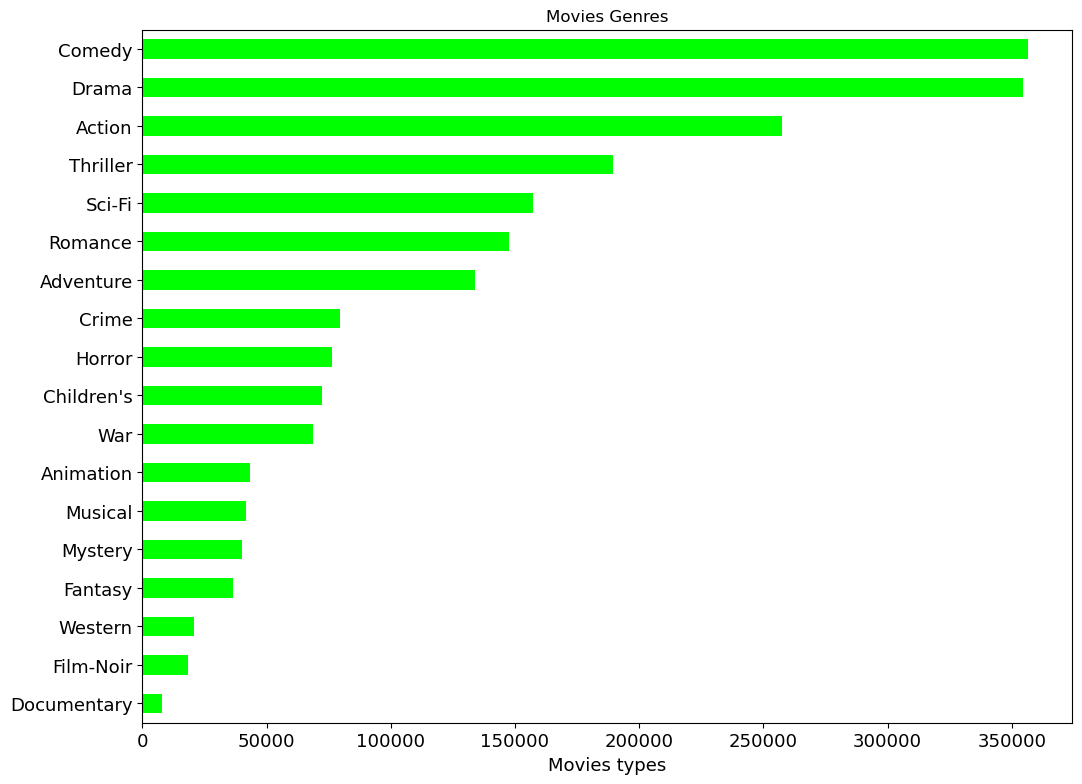

In [68]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Movies Genres')

# on x axis
lt.set_xlabel('Movies types', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

The maximum genres is comedy and drama! and I think it makes sense because it's judged by life stage between 20th and 30th!

# Exploring movies based on Recommendations and Ratings
> From top 50 rows

In [76]:
#Exploring from extracrting a sample from the data from the first 5o rows
top_50_rating_5 = df[df['Rating'] == 5].nlargest(50, 'Rating')[['Genres', 'Title', 'Rating']]
top_50_rating_4_3 = df[(df['Rating'] >= 3) & (df['Rating'] <= 4)].nlargest(50, 'Rating')[['Genres', 'Title', 'Rating']]
top_50_rating_2_1 = df[(df['Rating'] >= 1) & (df['Rating'] <= 2)].nlargest(50, 'Rating')[['Genres', 'Title', 'Rating']]

# Print the top 50 rated movies with rating 5
print("Top 50 Rated Movies (Rating: 5)")
print(top_50_rating_5.to_string(index=False))

# Print the top 50 rated movies with rating between 4 and 3
print("\nTop 50 Rated Movies (Rating: 4-3)")
print(top_50_rating_4_3.to_string(index=False))

# Print the top 50 rated movies with rating between 2 and 1
print("\nTop 50 Rated Movies (Rating: 2-1)")
print(top_50_rating_2_1.to_string(index=False))

Top 50 Rated Movies (Rating: 5)
Genres                                  Title  Rating
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)       5
 Drama One Flew Over the Cuckoo's Nest (1975)     

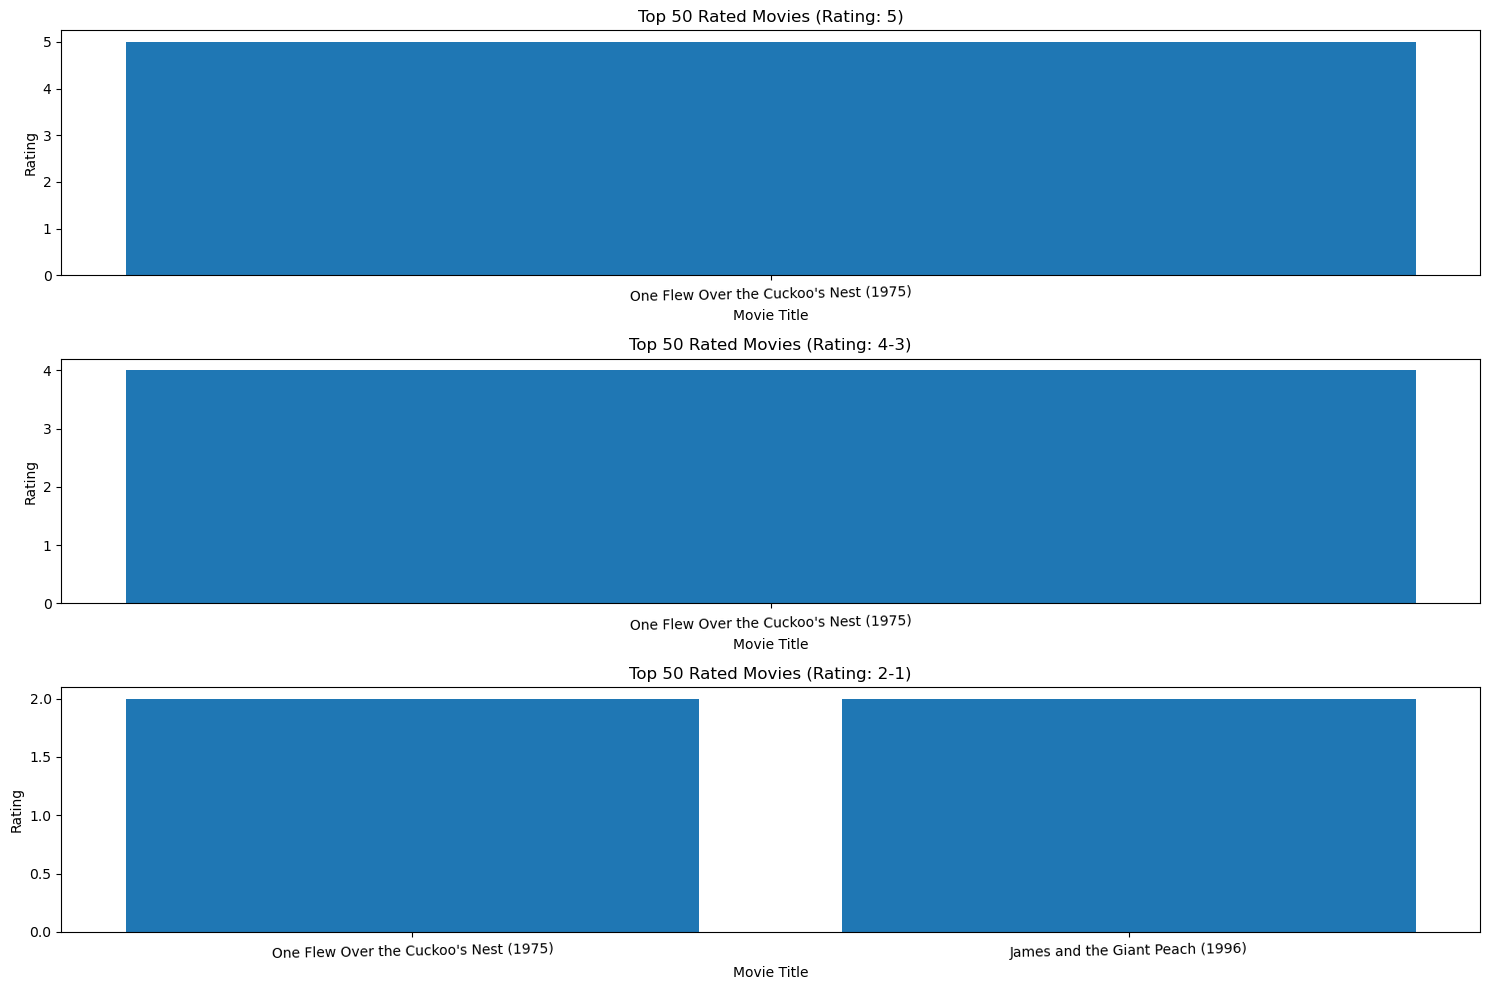

In [88]:
# Create subplots to display the top 50 rated movies in each rating range
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the top 50 rated movies with rating 5
axes[0].bar(top_50_rating_5['Title'], top_50_rating_5['Rating'])
axes[0].set_title('Top 50 Rated Movies (Rating: 5)')
axes[0].set_xlabel('Movie Title')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=1)

# Plot the top 50 rated movies with rating between 4 and 3
axes[1].bar(top_50_rating_4_3['Title'], top_50_rating_4_3['Rating'])
axes[1].set_title('Top 50 Rated Movies (Rating: 4-3)')
axes[1].set_xlabel('Movie Title')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=1)

# Plot the top 50 rated movies with rating between 2 and 1
axes[2].bar(top_50_rating_2_1['Title'], top_50_rating_2_1['Rating'])
axes[2].set_title('Top 50 Rated Movies (Rating: 2-1)')
axes[2].set_xlabel('Movie Title')
axes[2].set_ylabel('Rating')
axes[2].tick_params(axis='x', rotation=1)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

As we see! one movie is rated in 3 different rating scales! "One Flew Over the Cuckoo's Nest(1975) has a different types of judgements ! some of people will tell you that it is recommended, some will not, and some will say you can give it a try .. and I see that it is a something very realistic because people has a different opinions in nature! 

# Exploring movies based on Recommendations and Ratings
> From the bottom 50 rows

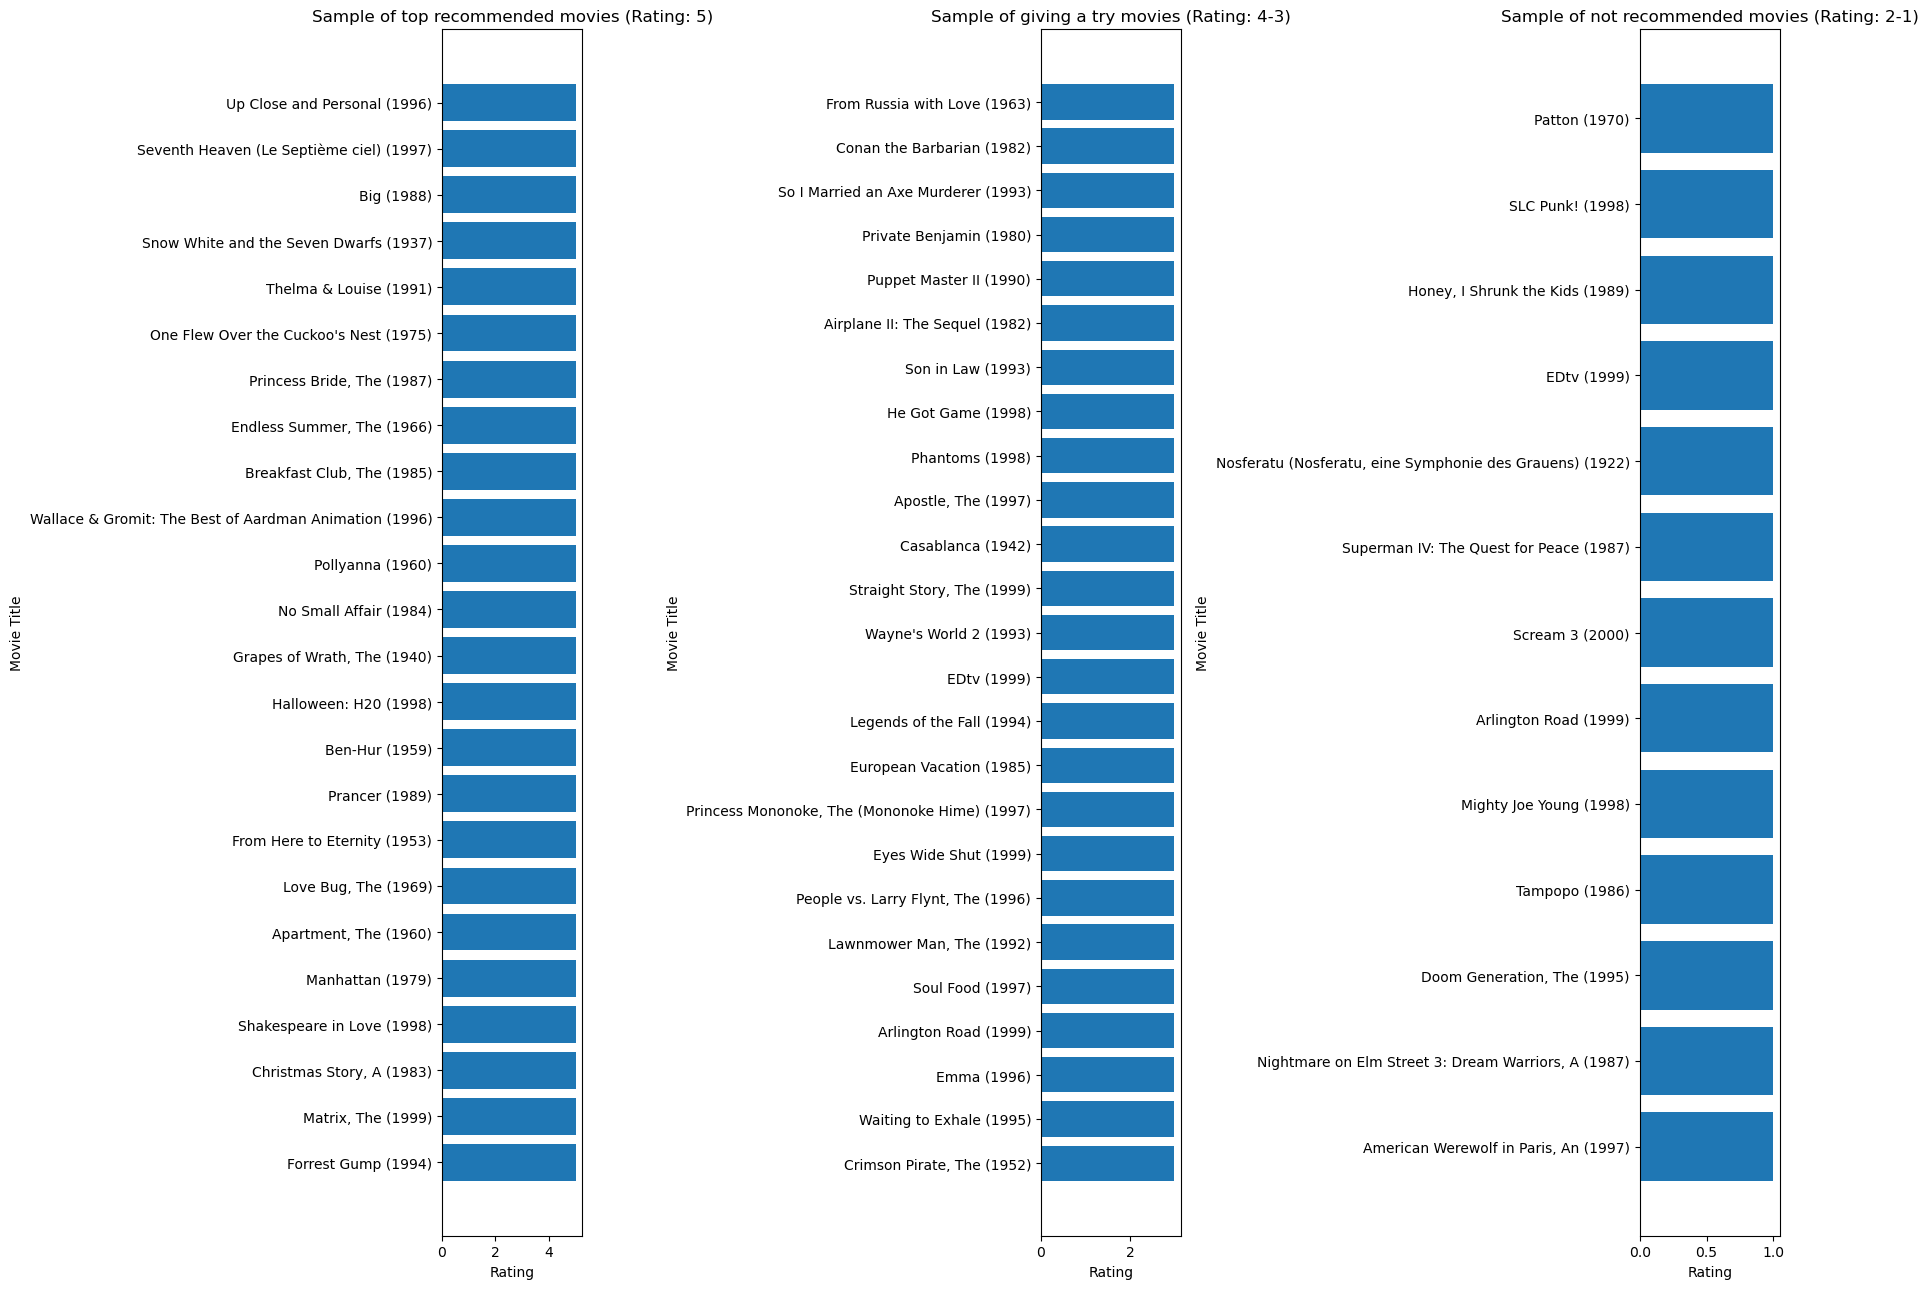

In [99]:
# Sort the data by rating in ascending order
sorted_df = df.sort_values('Rating')

# Select the bottom 50 rated movies with rating 5
bottom_50_rating_5 = sorted_df[sorted_df['Rating'] == 5].nsmallest(50, 'Rating')[['Genres', 'Title', 'Rating']]
# Select the bottom 50 rated movies with rating between 4 and 3
bottom_50_rating_4_3 = sorted_df[(sorted_df['Rating'] >= 3) & (sorted_df['Rating'] <= 4)].nsmallest(50, 'Rating')[['Genres', 'Title', 'Rating']]
# Select the bottom 50 rated movies with rating between 2 and 1
bottom_50_rating_2_1 = sorted_df[(sorted_df['Rating'] >= 1) & (sorted_df['Rating'] <= 2)].nsmallest(50, 'Rating')[['Genres', 'Title', 'Rating']]

# Create subplots to display the bottom 50 rated movies in each rating range
fig, axes = plt.subplots(1, 3, figsize=(18, 13))

# Plot the bottom 50 rated movies with rating 5
axes[0].barh(bottom_50_rating_5['Title'], bottom_50_rating_5['Rating'])
axes[0].set_title('Sample of top recommended movies (Rating: 5)')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Movie Title')

# Plot the bottom 50 rated movies with rating between 4 and 3
axes[1].barh(bottom_50_rating_4_3['Title'], bottom_50_rating_4_3['Rating'])
axes[1].set_title('Sample of giving a try movies (Rating: 4-3)')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Movie Title')

# Plot the bottom 50 rated movies with rating between 2 and 1
axes[2].barh(bottom_50_rating_2_1['Title'], bottom_50_rating_2_1['Rating'])
axes[2].set_title('Sample of not recommended movies (Rating: 2-1)')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Movie Title')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

As we see, it gives us a better variety of different rated movies, so it will be more easier to any person to choose which movie to watch!

# Exploring of Gender

In [103]:
gender_counts= df['Gender'].value_counts()

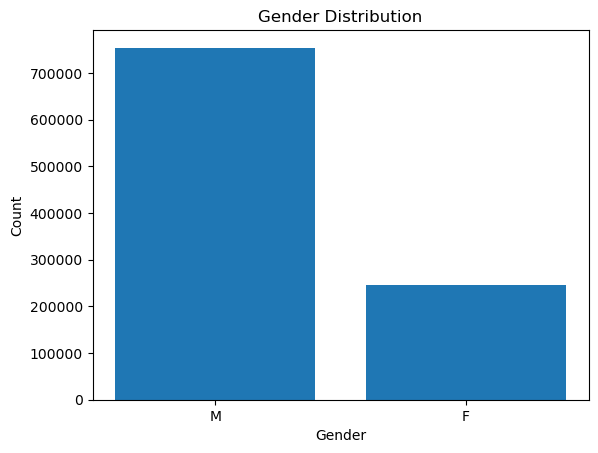

In [106]:
plt.bar(gender_counts.index, gender_counts.values)

# Set the title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

We have more of male users than females!

<a id='conclusions'></a>
## Conclusions

> Finally, after investigating the dataset, and exploring it successflly using visuals to answer the question, It seems to be clear that ratings affect the movies which affect the revenues of that movie directly! also it was so helpful to explore which was the most frequent genres and which was the most recmmonded ones! so it can help the directors to choose the genres of their movies carefully!.

> Also it was very intersting to see that 1 movie can be in 3 rating cycles ! it shows how different of opinions the people have

>Limitations: This analysis was done considering the movies which had a significant amount of users and movies . This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely corect and up-to-date. As mentioned before I extract a sample from the data too see the most rated, it might be possible different movies have ratings from different users. So a disparity arises here which can state the complete analysis wrong.